In [7]:
import seaborn
import matplotlib.pyplot as plt
import math
import os
import numpy
import pyBigWig
from scipy import stats

seaborn.set(rc={'figure.figsize':(5,5)})

In [8]:
bw = {'early': {1: {}, 2: {}}, 'late': {1: {}, 2: {}}}
bw['early'][1]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S3-5h_plus_rpkm.bw")
bw['early'][2]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S4-5h_plus_rpkm.bw")
bw['late'][1]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S5-16h_plus_rpkm.bw")
bw['late'][2]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S6-16h_plus_rpkm.bw")
bw['early'][1]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S3-5h_minus_rpkm.bw")
bw['early'][2]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S4-5h_minus_rpkm.bw")
bw['late'][1]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S5-16h_minus_rpkm.bw")
bw['late'][2]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/Bowtie2_S6-16h_minus_rpkm.bw")

In [29]:
def get_corr(bw1, bw2, window=100, toplot=True, savefig='/Users/dor/Desktop/fig.pdf', title=''):
    chrom_d = bw1.chroms()
    chrom = list(chrom_d.keys())[0]
    chrom_size = chrom_d[chrom]

    values1, values2 = [], []
    for i in range(int(chrom_size/window)):
        mean1 = bw1.stats(chrom, i*window, (i+1)*window, "mean")[0]
        mean2 = bw2.stats(chrom, i*window, (i+1)*window, "mean")[0]
        values1.append(mean1)
        values2.append(mean2)
    
    if toplot:
        plt.plot(values1, values2, 'o', color='black', alpha=0.1)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel("Replicate 1, coverage of 5' ends")
        plt.ylabel("Replicate 2, coverage of 5' ends")
        if savefig:
            if title:
                plt.title(title)
            plt.savefig(savefig)
        
    return stats.pearsonr(values1, values2)

SpearmanrResult(correlation=0.7788209321612326, pvalue=0.0)

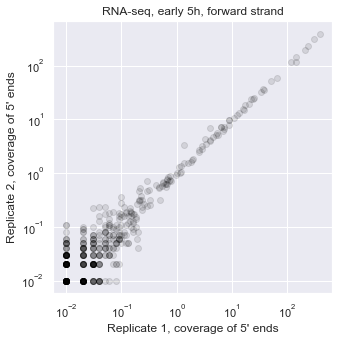

In [27]:
get_corr(bw['early'][1]['plus'], bw['early'][2]['plus'], title='RNA-seq, early 5h, forward strand')

(0.9912063582514021, 0.0)

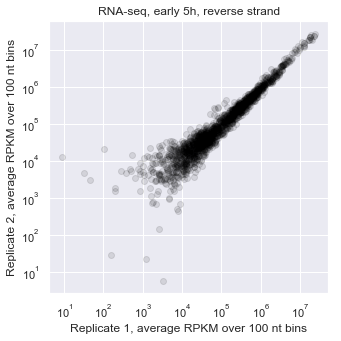

In [18]:
get_corr(bw['early'][1]['minus'], bw['early'][2]['minus'], title='RNA-seq, early 5h, reverse strand')

(0.8197596153086267, 0.0)

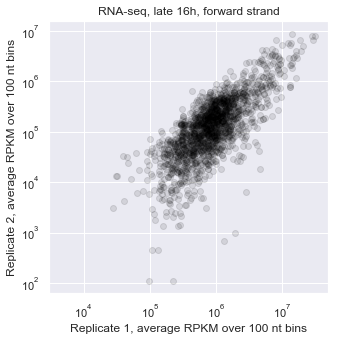

In [19]:
get_corr(bw['late'][1]['plus'], bw['late'][2]['plus'], title='RNA-seq, late 16h, forward strand')

(0.7368404419826746, 3.7274553162629755e-291)

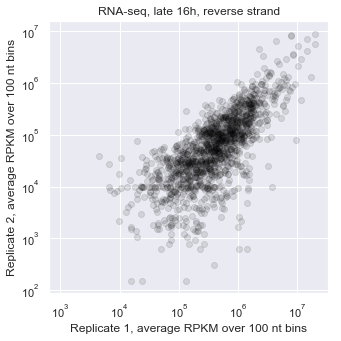

In [20]:
get_corr(bw['late'][1]['minus'], bw['late'][2]['minus'], title='RNA-seq, late 16h, reverse strand')

## CAGE-seq

In [21]:
bw = {'early': {1: {}, 2: {}}, 'late': {1: {}, 2: {}}}
bw['early'][1]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/S1-5h_5cov-.bw")
bw['early'][2]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/S2-5h_5cov-.bw")
bw['late'][1]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/S3-16h_5cov-.bw")
bw['late'][2]['minus'] = pyBigWig.open("../myHub/ASFV/bbi/S4-16h_5cov-.bw")
bw['early'][1]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/S1-5h_5cov+.bw")
bw['early'][2]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/S2-5h_5cov+.bw")
bw['late'][1]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/S3-16h_5cov+.bw")
bw['late'][2]['plus'] = pyBigWig.open("../myHub/ASFV/bbi/S4-16h_5cov+.bw")

(0.9985684347737904, 0.0)

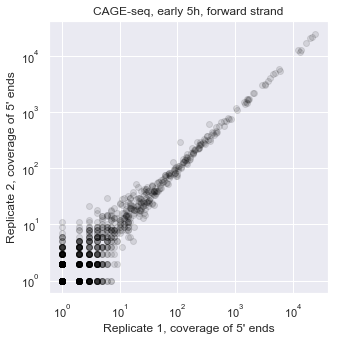

In [24]:
get_corr(bw['early'][1]['plus'], bw['early'][2]['plus'], 
         window=1, 
         title='CAGE-seq, early 5h, forward strand')

(0.9990603610771265, 0.0)

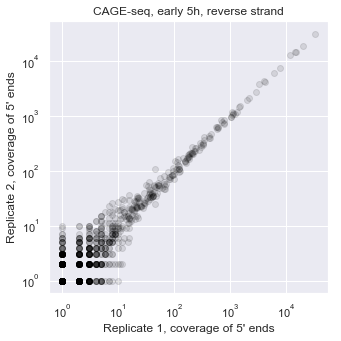

In [34]:
get_corr(bw['early'][1]['minus'], bw['early'][2]['minus'], 
         window=1, 
         title='CAGE-seq, early 5h, reverse strand')

(0.9888272339272758, 0.0)

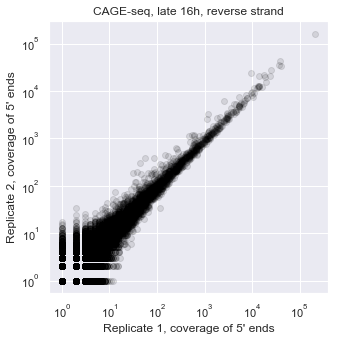

In [32]:
get_corr(bw['late'][1]['minus'], bw['late'][2]['minus'], 
         window=1, 
         title='CAGE-seq, late 16h, reverse strand')

(0.9992095681059341, 0.0)

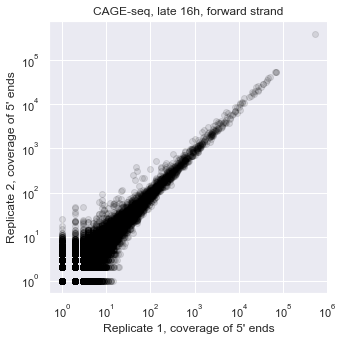

In [33]:
get_corr(bw['late'][1]['plus'], bw['late'][2]['plus'], 
         window=1, 
         title='CAGE-seq, late 16h, forward strand')